In [1]:
import pprint

import ee
from IPython.display import Image

import openet.core.common as common
import openet.core.utils as utils

In [2]:
ee.Initialize()

In [3]:
image_size = 1024

### Landsat Image

In [4]:
landsat_id = 'LC08_038031_20130828'  # Cloudy, some clear areas Bear Lake, UT
# landsat_id = 'LC08_044033_20170918'  # Cloudy, some clear areas over northern CV
landsat_img = ee.Image('LANDSAT/LC08/C02/T1_L2/{}'.format(landsat_id))

landsat_proj = landsat_img.projection()
crs = landsat_img.select('SR_B3').projection().getInfo()['crs']
geo = landsat_img.select('SR_B3').projection().getInfo()['transform']
print(landsat_proj.getInfo())

{'type': 'Projection', 'crs': 'EPSG:32612', 'transform': [30, 0, 339885, 0, -30, 4741515]}


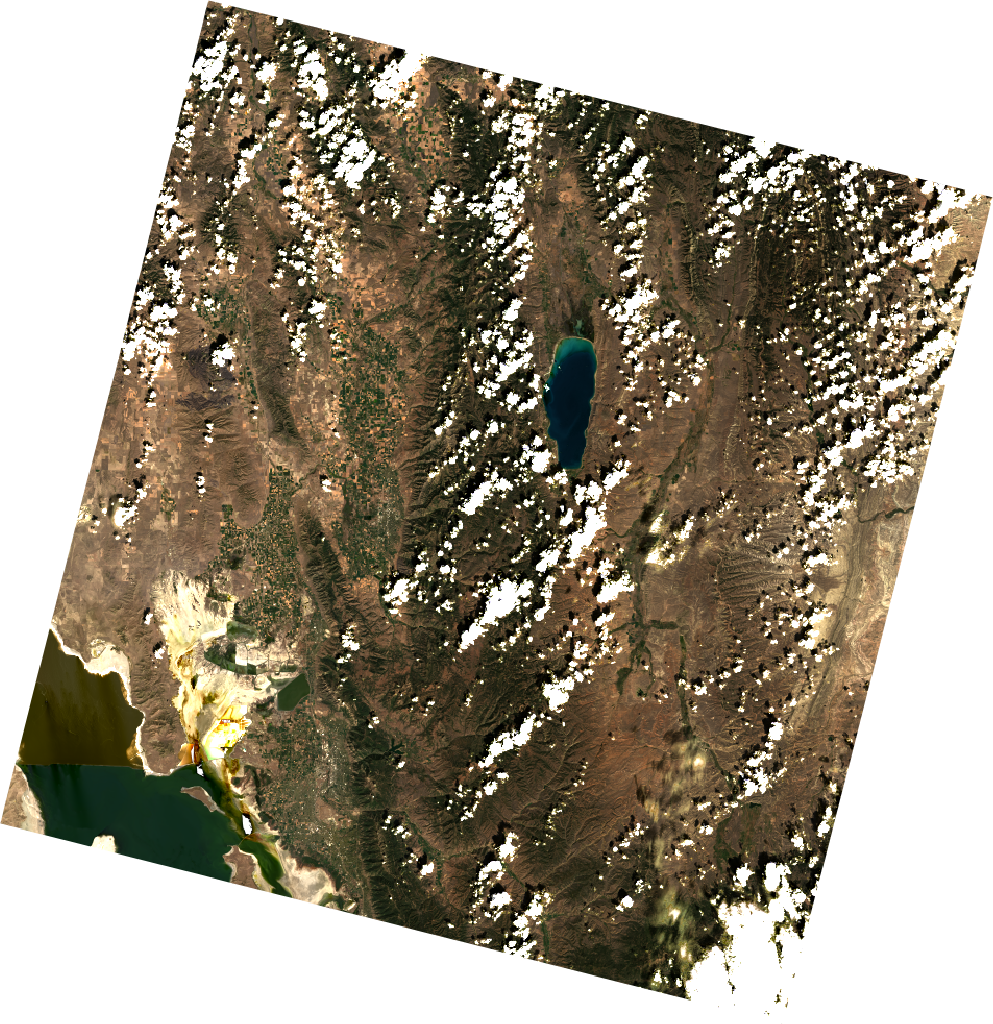

In [5]:
image_url = (
    landsat_img.select([3, 2, 1]).multiply([0.0000275]).add([-0.2])
    .getThumbURL({'min': 0.0, 'max': 0.3, 'dimensions':image_size})
)
Image(url=image_url, embed=True, format='png')

### Image List

In [6]:
# landsat_coll = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')\
#     .filterDate('2017-01-01', '2018-01-01')\
#     .filterMetadata('WRS_PATH', 'equals', 44)\
#     .filterMetadata('WRS_ROW', 'equals', 33)
# pprint.pprint(landsat_coll.aggregate_histogram('system:index').getInfo())

In [7]:
# landsat_id = 'LC08_044033_20170105'  # Cloudy over Sierra
# landsat_id = 'LC08_044033_20170121'  # Cloudy
# landsat_id = 'LC08_044033_20170206'  # Really cloudy
# landsat_id = 'LC08_044033_20170222'  # Really cloudy
# landsat_id = 'LC08_044033_20170427'  # Cloudy
# landsat_id = 'LC08_044033_20170513'  # Clear over CV
# landsat_id = 'LC08_044033_20170529'  # Clear over CV, some cirrus
# landsat_id = 'LC08_044033_20170614'  # Clear
# landsat_id = 'LC08_044033_20170630'  # Clear (small smoke plumes?)
# landsat_id = 'LC08_044033_20170716'  # Clear
# landsat_id = 'LC08_044033_20170801'  # Clear
# landsat_id = 'LC08_044033_20170817'  # Clear
# landsat_id = 'LC08_044033_20170902'  # Thin cirrus or smoke
# landsat_id = 'LC08_044033_20170918'  # Cloudy, some clear areas over northern CV
# landsat_id = 'LC08_044033_20171004'  # Clear
# landsat_id = 'LC08_044033_20171020'  # Really cloudy, some clear areas over northern CV
# landsat_id = 'LC08_044033_20171105'  # Few clouds over northern CV
# landsat_id = 'LC08_044033_20171121'  # Really cloudy, some clear areas over northern CV
# landsat_id = 'LC08_044033_20171207'  # Clear
# landsat_id = 'LC08_044033_20171223'  # Cloudy and cirrus over full image

### Study Area

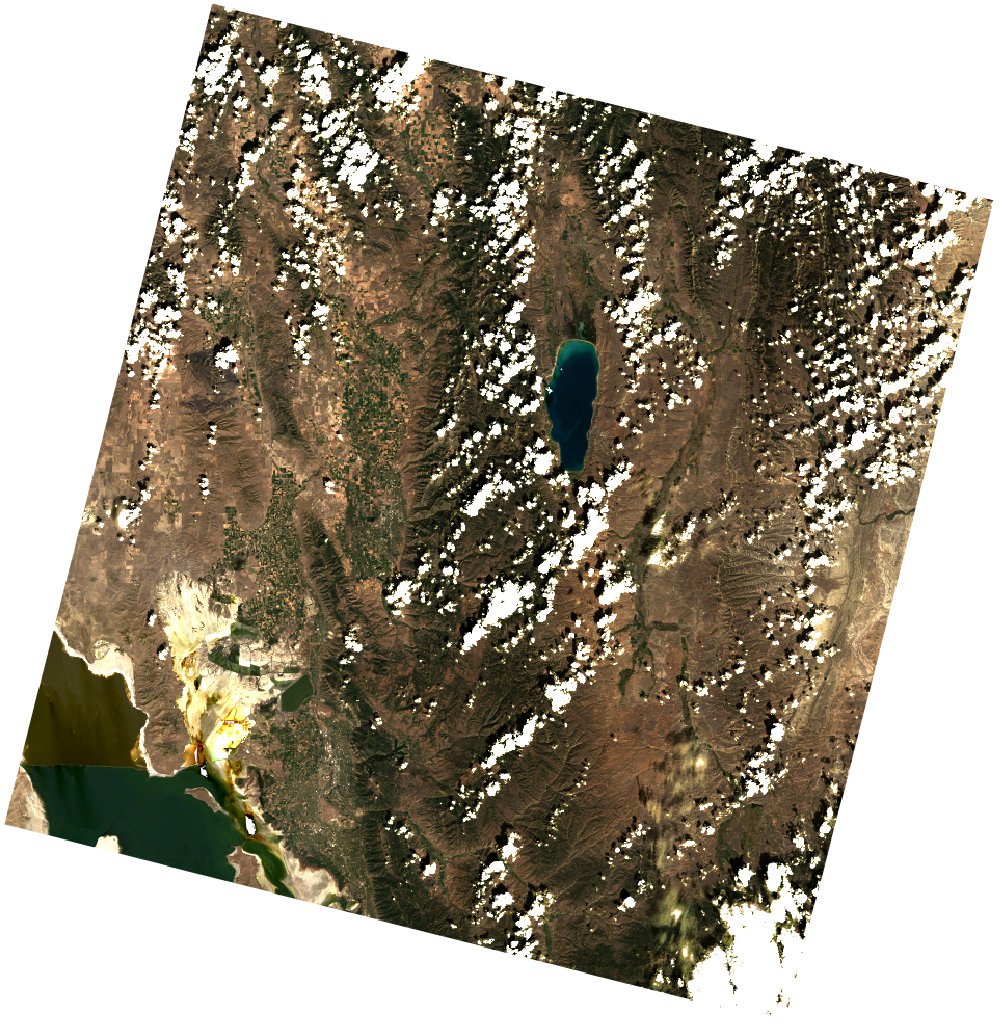

In [8]:
# study_geom = ee.Geometry.Rectangle(-111.68, 41.95, -111.63, 41.96)
study_geom = landsat_img.geometry()
region = study_geom.bounds(1, 'EPSG:4326')

image_url = (
    landsat_img.select(['SR_B4', 'SR_B3', 'SR_B2']).multiply([0.0000275]).add([-0.2])
    .getThumbURL({'min': 0.0, 'max': 0.3, 'region': region, 'dimensions':image_size})
)
Image(url=image_url, embed=True, format='png')

In [9]:
### Cloud Mask

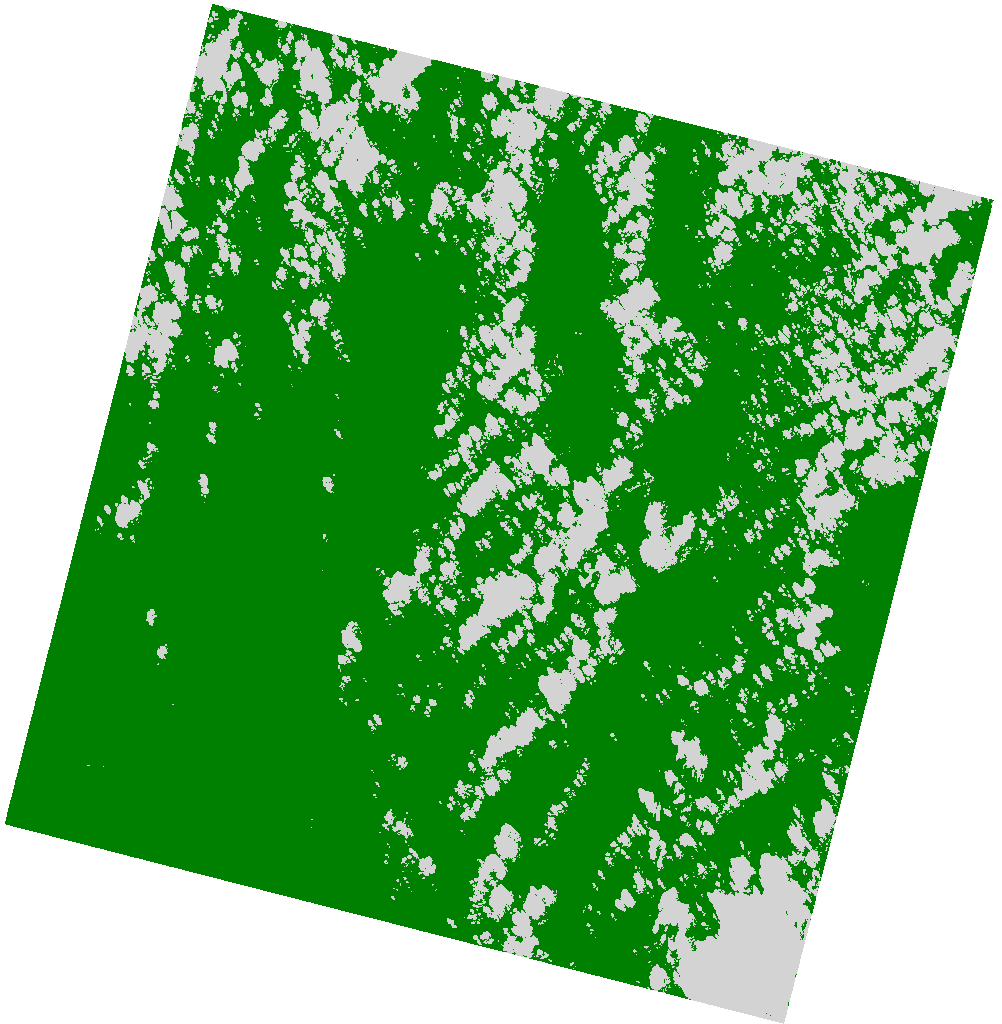

In [10]:
# Note that the cloud mask being returned is 0 for cloud and 1 for non-cloud
# This is done so the output can be passed directly to and updateMask() call
image_url = (
    common.landsat_c2_sr_cloud_mask(landsat_img).Not()
    .reproject(crs=crs, crsTransform=geo)
    .getThumbURL({'min': 0, 'max': 1, 'palette': ['green', 'lightgray'], 'region': region, 'dimensions':image_size})
)
Image(url=image_url, embed=True, format='png')

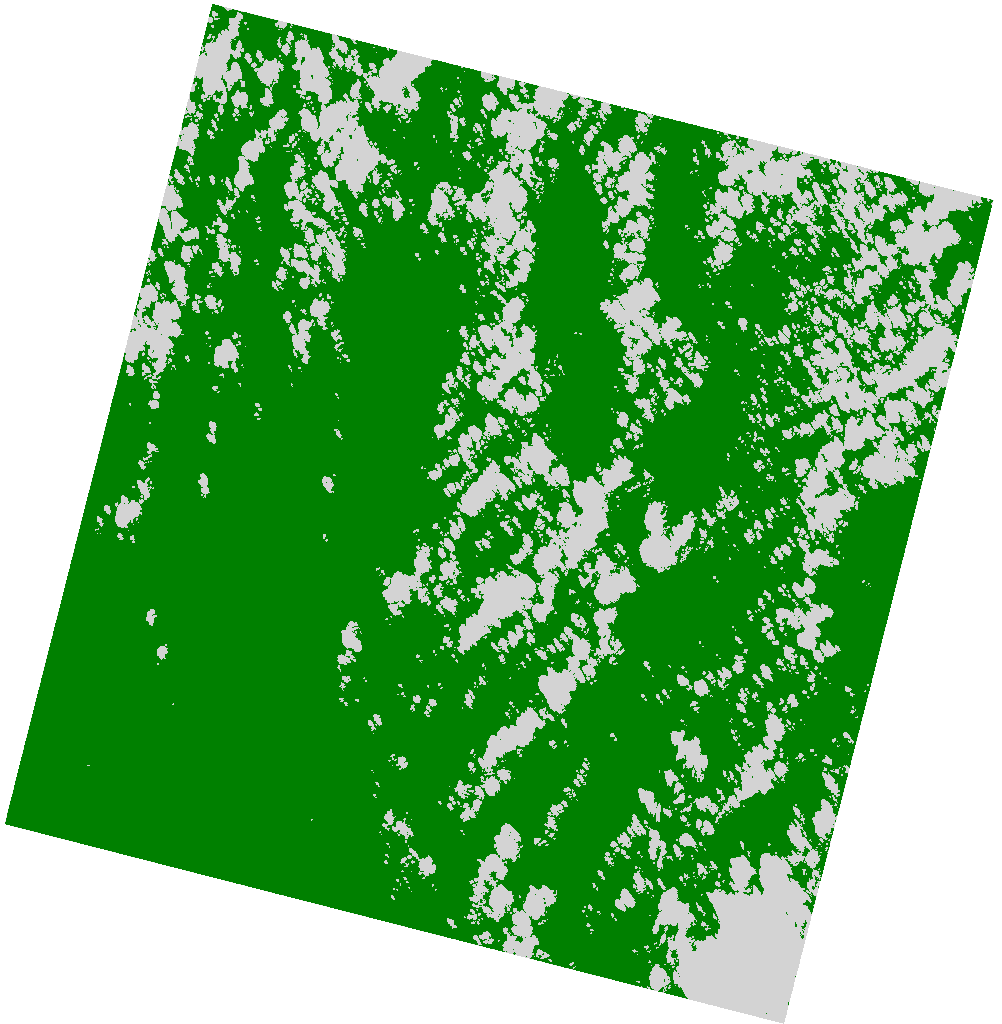

In [11]:
### Cloud Mask with filtering
image_url = (
    common.landsat_c2_sr_cloud_mask(landsat_img, filter_flag=True).Not()
    .reproject(crs=crs, crsTransform=geo)
    .getThumbURL({'min': 0, 'max': 1, 'palette': ['green', 'lightgray'], 'region': region, 'dimensions':image_size})
)
Image(url=image_url, embed=True, format='png')

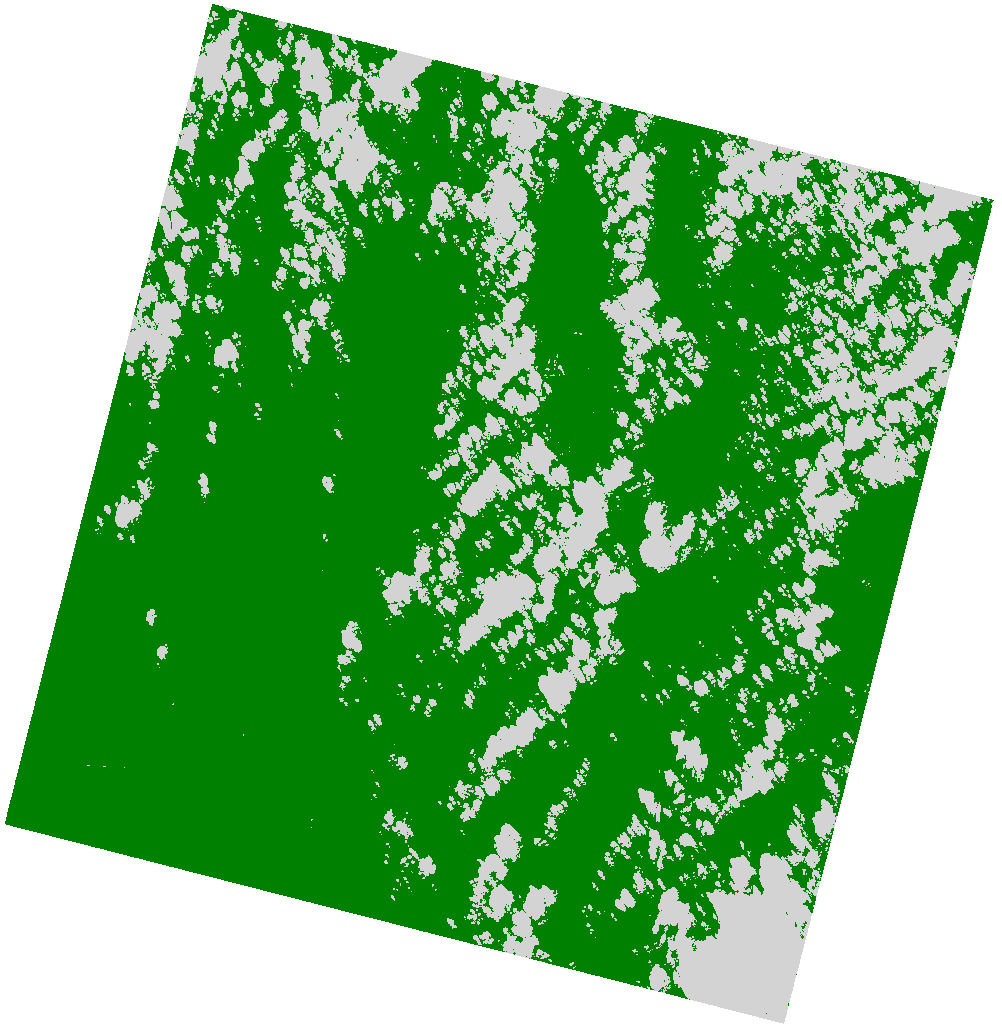

In [12]:
### Cloud Mask with buffering
image_url = (
    common.landsat_c2_sr_cloud_mask(landsat_img, buffer_flag=True, buffer_dist=1).Not()
    .reproject(crs=crs, crsTransform=geo)
    .getThumbURL({'min': 0, 'max': 1, 'palette': ['green', 'lightgray'], 'region': region, 'dimensions':image_size})
)
Image(url=image_url, embed=True, format='png')

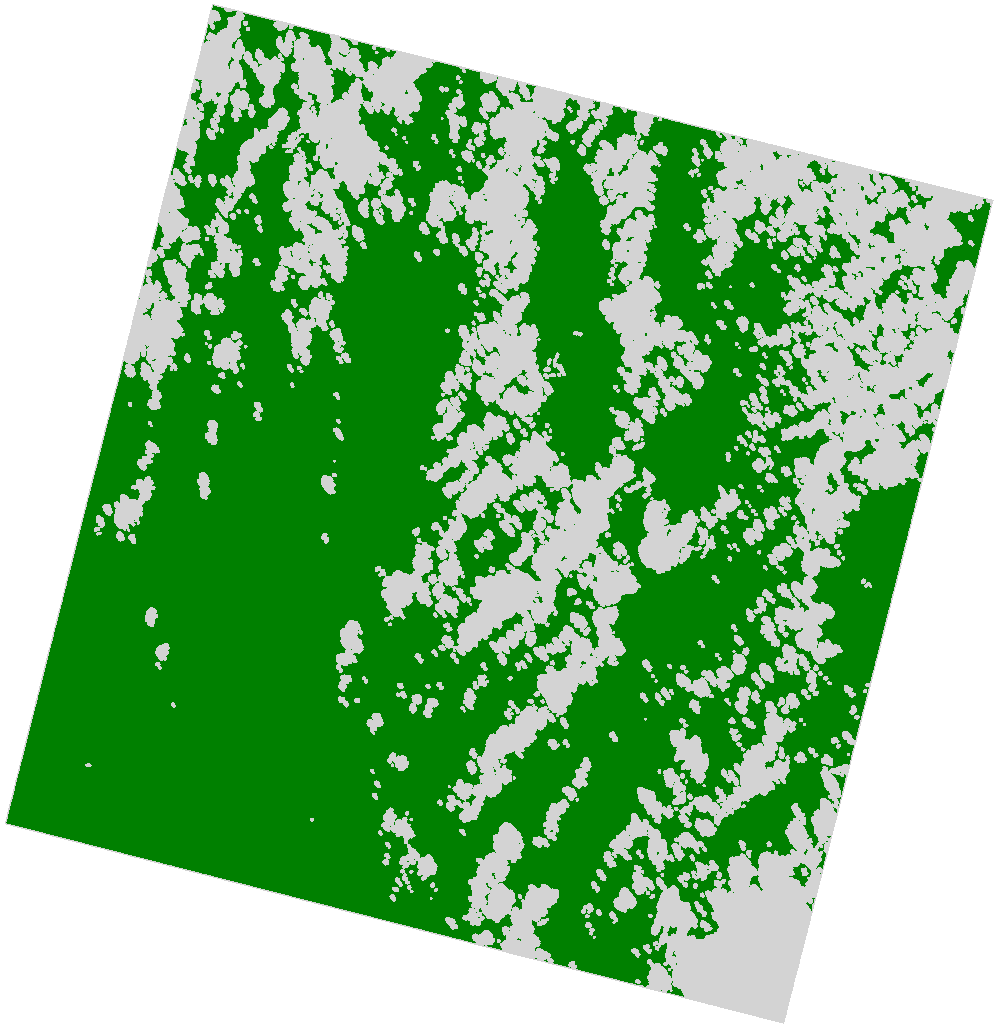

In [14]:
### Cloud Mask with buffering
image_url = (
    common.landsat_c2_sr_cloud_mask(landsat_img, filter_flag=True, buffer_flag=True, buffer_dist=9).Not()
    .reproject(crs=crs, crsTransform=geo)
    .getThumbURL({'min': 0, 'max': 1, 'palette': ['green', 'lightgray'], 'region': region, 'dimensions':image_size})
)
Image(url=image_url, embed=True, format='png')